In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,N
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
977,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
978,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
979,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


# Dealing with missing values

In [6]:
df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_status           0
dtype: int64

In [7]:
df.shape

(981, 13)

# DATA CLEANING

# filling up categorical misising values

In [8]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


# counting the Dependents for better understanding about the data before filling it up

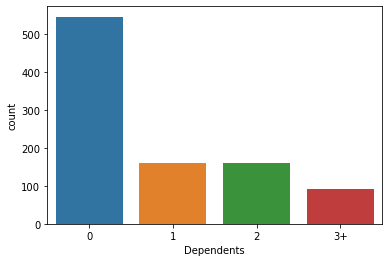

In [9]:
sns.countplot(x="Dependents",data=df)
plt.show()

# filling with mode

In [10]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

# filling numerical values

In [11]:
df["Credit_History"].unique()

array([ 1., nan,  0.])

# check for outliers before filling up numerical values

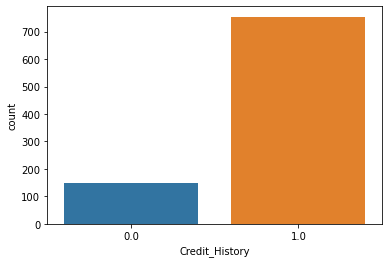

In [12]:
sns.countplot(x="Credit_History",data=df)
plt.show()

In [13]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

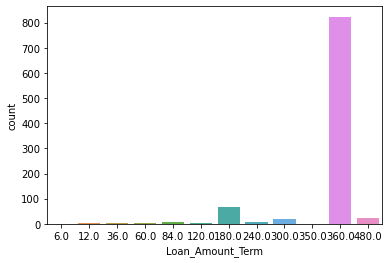

In [14]:
sns.countplot(x="Loan_Amount_Term",data=df)
plt.show()

In [15]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

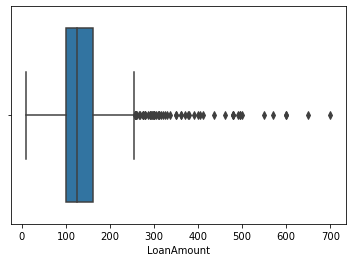

In [16]:
sns.boxplot(x="LoanAmount", data=df)
plt.show()

#  use median to replace the missing value

In [17]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

# No missing values

In [18]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_status          0
dtype: int64

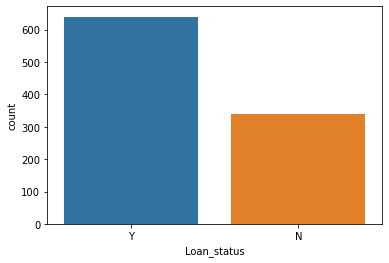

In [19]:
sns.countplot(df["Loan_status"])
plt.show()

In [20]:
df['Loan_status'].replace('N',0,inplace=True)
df['Loan_status'].replace('Y',1,inplace=True)

# EDA

# Credit history vs loan status

C:\Users\sajan\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x1080 with 0 Axes>

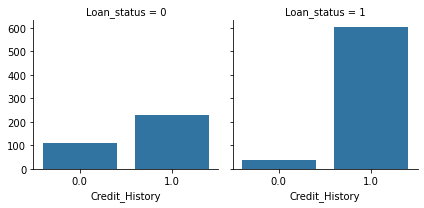

In [21]:
plt.figure(figsize=(10,15))
grid = sns.FacetGrid(df,col="Loan_status")
grid.map(sns.countplot,"Credit_History")
plt.show()

# Gender vs loan status

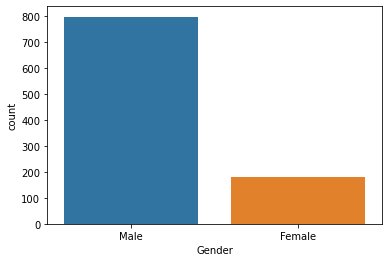

In [22]:
sns.countplot(x="Gender",data=df)
plt.show()

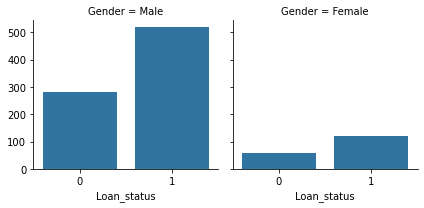

In [23]:
grid = sns.FacetGrid(df,col="Gender")
grid.map(sns.countplot,"Loan_status")
plt.show()

# Married vs loan status

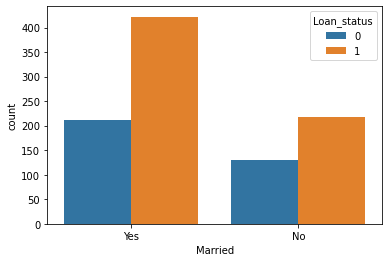

In [24]:
sns.countplot(x="Married",hue="Loan_status",data=df)
plt.show()

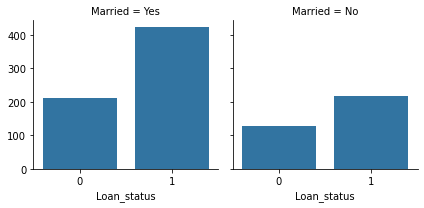

In [25]:
grid = sns.FacetGrid(df,col="Married")
grid.map(sns.countplot,"Loan_status")
plt.show()

# Dependents vs loan status

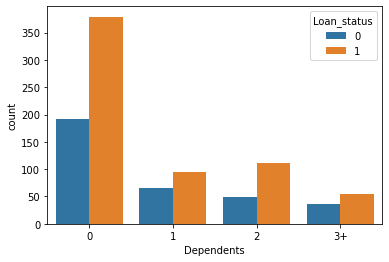

In [26]:
sns.countplot(x="Dependents",hue="Loan_status",data=df)
plt.show()

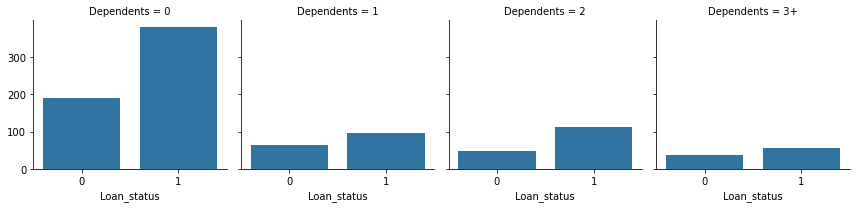

In [27]:
grid = sns.FacetGrid(df,col="Dependents")
grid.map(sns.countplot,"Loan_status")
plt.show()

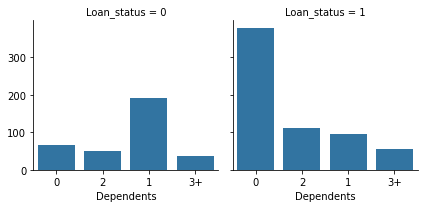

In [28]:
grid = sns.FacetGrid(df,col="Loan_status")
grid.map(sns.countplot,"Dependents")
plt.show()


# Education vs loan status 

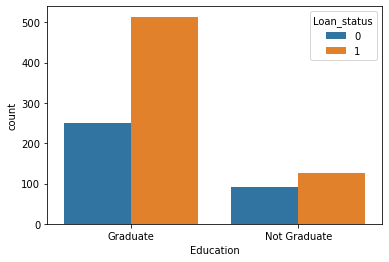

In [29]:
sns.countplot(x="Education",hue="Loan_status",data=df)
plt.show()

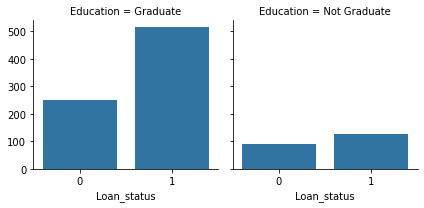

In [30]:
grid = sns.FacetGrid(df,col="Education")
grid.map(sns.countplot,"Loan_status")
plt.show()

# Self_Employed vs loan status

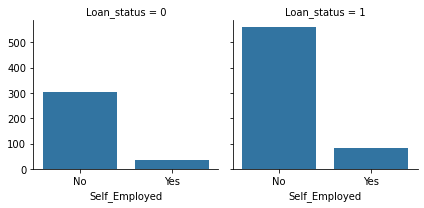

In [31]:
grid = sns.FacetGrid(df,col="Loan_status")
grid.map(sns.countplot,"Self_Employed")
plt.show()

# Property area vs loan status

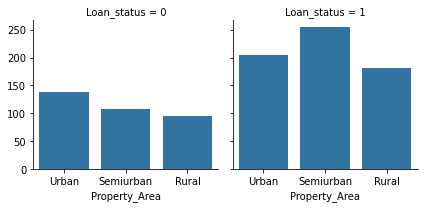

In [32]:
grid = sns.FacetGrid(df,col="Loan_status")
grid.map(sns.countplot,"Property_Area")
plt.show()

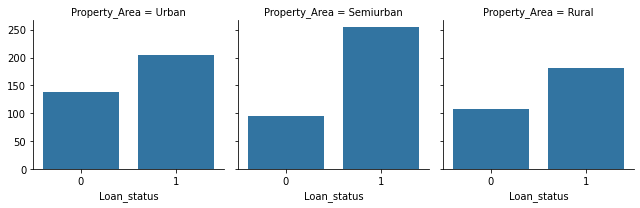

In [33]:
grid = sns.FacetGrid(df,col="Property_Area")
grid.map(sns.countplot,"Loan_status")
plt.show()

In [34]:
df["Total_Income"]=df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,1,5720.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,0,4576.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,1,6800.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,1,4886.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,1,3276.0


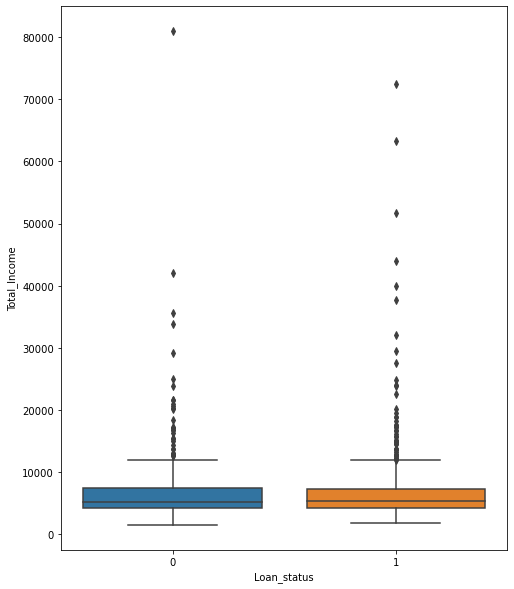

In [35]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_status",y="Total_Income", data=df)
plt.show()

In [36]:
df["Loan_Amount_Term"].unique()

array([360., 240., 180.,  60., 480.,  84.,  12., 300., 350.,  36., 120.,
         6.])

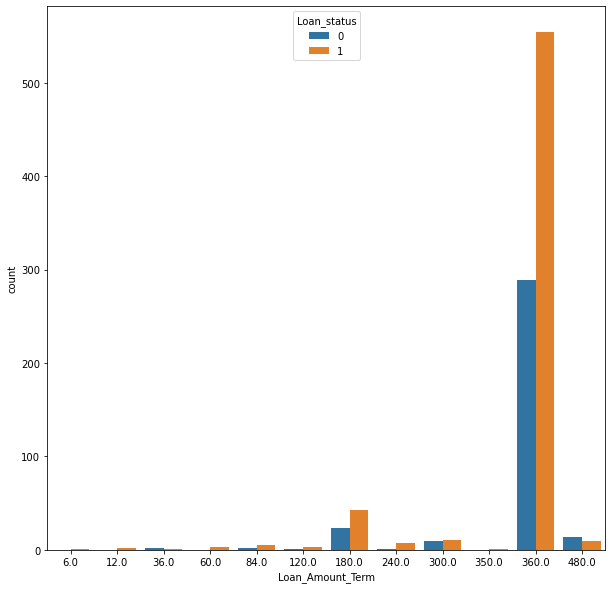

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(x="Loan_Amount_Term",hue="Loan_status", data=df)
plt.show()

In [38]:
df["LoanAmount"].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50., 163.,
       360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119., 165.,
        93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,  70.,
       132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,  72.,
       214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235., 336.,
        96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,  66.,
        64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99., 240.,
       460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,  67.,
       181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,  76.,
        98., 267., 168., 349.,  17., 315., 191., 20

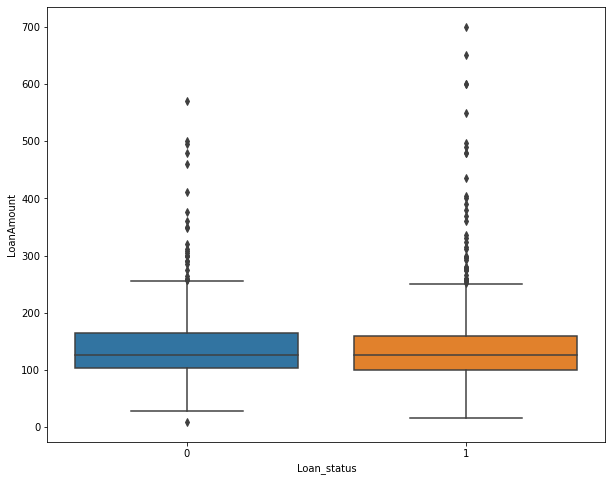

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Loan_status",y="LoanAmount", data=df)
plt.show()

# Dropping features which are not in use

In [40]:
cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_Income",
        "Loan_ID","CoapplicantIncome","Dependents"]
df=df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_status
0,Male,Yes,Graduate,No,1.0,Urban,1
1,Male,Yes,Graduate,No,1.0,Urban,0
2,Male,Yes,Graduate,No,1.0,Urban,1
3,Male,Yes,Graduate,No,1.0,Urban,1
4,Male,No,Not Graduate,No,1.0,Urban,1


In [41]:
df.dtypes

Gender             object
Married            object
Education          object
Self_Employed      object
Credit_History    float64
Property_Area      object
Loan_status         int64
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder
cols=["Gender","Married","Education","Self_Employed","Property_Area"]
lab=LabelEncoder()
for i in cols:
    df[i]= lab.fit_transform(df[i])

In [43]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_status
0,1,1,0,0,1.0,2,1
1,1,1,0,0,1.0,2,0
2,1,1,0,0,1.0,2,1
3,1,1,0,0,1.0,2,1
4,1,0,1,0,1.0,2,1


In [44]:
x=df.drop("Loan_status",axis=1)

In [45]:
y=df["Loan_status"]

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [48]:
model.score(x_test,y_test)

0.7270875763747454

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [50]:
model.score(x_test,y_test)

0.7026476578411406

# Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 55, 114],
       [ 32, 290]], dtype=int64)

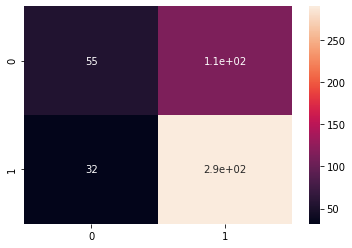

In [52]:
sns.heatmap(cm, annot=True)
plt.show()